# Importing Dataset

In [92]:
import urllib.request

url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
filename = 'mnist.npz'
urllib.request.urlretrieve(url, filename)

('mnist.npz', <http.client.HTTPMessage at 0x27d8a744fa0>)

# NN Class

In [93]:
class NeuroNetwork():
    def __init__ (self):
        
        #Three AFFINE layers
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.w2 = np.random.randn(hidden_size, hidden_size)
        self.b2 = np.zeros(hidden_size)
        self.w3 = np.random.randn(hidden_size, hidden_size)
        self.b3 = np.zeros(hidden_size)
        self.w4 = np.random.randn(hidden_size, num_classes)
        self.b4 = np.zeros(num_classes)
    
    # Define the activation functions
    def softmax(self, x):
        exp = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp / np.sum(exp, axis=1, keepdims=True)
    
    def ReLU(self, X):
        return np.maximum(0, X)
    
    # Define the forward function
    def forward(self, x):
        z1 = np.dot(x, self.w1) + self.b1 
        a1 = self.ReLU(z1)
        z2 = np.dot(a1, self.w2) + self.b2
        a2 = self.ReLU(z2)
        z3 = np.dot(a2, self.w3) + self.b3
        a3 = self.ReLU(z3)
        z4 = np.dot(a3, self.w4) + self.b4
        return self.softmax(z4)

    # Define the backward function
    def backward(self, x, y, y_pred):
        y= y.reshape(len(y),-1)
        
        #extracting derivatives
        delta5 = y_pred - y
        delta4 = np.dot(delta5, self.w4.T) * (np.maximum(0, np.dot(x, self.w1) + self.b1) > 0) #for RELU derivative
        
        delta3 = np.dot(delta4, self.w3.T) * (np.maximum(0, np.dot(x, self.w1) + self.b1) > 0)
        
        delta2 = np.dot(delta3, self.w2.T) * (np.maximum(0, np.dot(x, self.w1) + self.b1) > 0)
        
        dw4 = np.dot(delta5.T, np.maximum(0, np.dot(a3, self.w4) + self.b4))
        
        db4 = np.sum(delta5, axis=0)
        
        dw3 = np.dot(delta4.T, np.maximum(0, np.dot(a2, self.w3) + self.b3))
        
        db3 = np.sum(delta4, axis=0)
        
        dw2 = np.dot(delta3.T, np.maximum(0, np.dot(a1, self.w2) + self.b2))
        
        db2 = np.sum(delta3, axis=0)
        
        dw1 = np.dot(x.T, delta2)
        
        db1 = np.sum(delta2, axis=0)
        
        return dw1, db1, dw2, db2, dw3, db3, dw4, db4

    def train(self,x_train,y_train, learning_rate= 0.1,num_epochs=10,batch_size=128): #Xtain andd Ytrain
        input_size = x_train.shape[1]
        hidden_size = 128
        num_classes = len(np.unique(y_train)) #classes (output layer neurons)
        
        # Train the model
        w1 = np.random.randn(input_size, hidden_size)
        b1 = np.zeros(hidden_size)
        w2 = np.random.randn(hidden_size, num_classes)
        b2 = np.zeros(num_classes)

        for epoch in range(num_epochs):
            for i in range(0, x_train.shape[0], batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]

                y_pred = forward(x_batch, w1, b1, w2, b2)
                dw1, db1, dw2, db2 = backward(x_batch, y_batch, y_pred, w1, b1, w2, b2)

                w1 -= learning_rate * dw1
                b1 -= learning_rate * db1
                w2 -= learning_rate * dw2.T
                b2 -= learning_rate * db2

            y_pred_val = forward(x_val, w1, b1, w2, b2)
            val_acc = accuracy_score(y_val, np.argmax(y_pred_val, axis=1))
            print('Epoch [{}/{}], Validation Accuracy: {:.4f}'.format(epoch+1, num_epochs, val_acc))

    def test(self):
        y_pred_test = forward(x_test, w1, b1, w2, b2)
        test_acc = accuracy_score(y_test, np.argmax(y_pred_test, axis=1))
        print('Test Accuracy: {:.4f}'.format(test_acc))

        #PLOTTING using subplots
        fig, axs = plt.subplots(3, 3, figsize=(8, 8))
        for i, ax in enumerate(axs.flatten()):
            print("lables: ",y_test[i])
            ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
            #ax.axis('off')
            ax.set_title('True: {}, Pred: {}'.format(y_test[i], np.argmax(y_pred_test[i])))
        plt.show()

# Test Train Split

In [94]:
Data = np.load('mnist.npz')
x_train = Data['x_train']
y_train = Data['y_train']
x_test = Data['x_test']
y_test = Data['y_test']

# Reshaping
x_train = x_train.reshape(x_train.shape[0], -1) / 255.
x_test = x_test.reshape(x_test.shape[0], -1) / 255.

# SPLITTING DATA 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Training Model

In [95]:
nn = NeuroNetwork()

In [96]:
nn.train(x_train,y_train)

C:\Users\A1D\AppData\Local\Temp/ipykernel_13544/1168420106.py:30: RuntimeWarning: invalid value encountered in subtract
  exp = np.exp(x - np.max(x, axis=1, keepdims=True))


Epoch [1/10], Validation Accuracy: 0.0979
Epoch [2/10], Validation Accuracy: 0.0979
Epoch [3/10], Validation Accuracy: 0.0979
Epoch [4/10], Validation Accuracy: 0.0979
Epoch [5/10], Validation Accuracy: 0.0979
Epoch [6/10], Validation Accuracy: 0.0979
Epoch [7/10], Validation Accuracy: 0.0979
Epoch [8/10], Validation Accuracy: 0.0979
Epoch [9/10], Validation Accuracy: 0.0979
Epoch [10/10], Validation Accuracy: 0.0979


# Testing

Test Accuracy: 0.0980
lables:  7
lables:  2
lables:  1
lables:  0
lables:  4
lables:  1
lables:  4
lables:  9
lables:  5


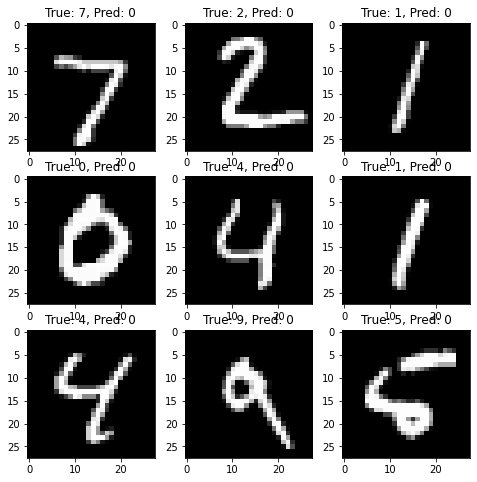

In [97]:
nn.test()

# Rough work


In [98]:
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True)

In [99]:
im = mnist_trainset.data[0:3] / 255
label = mnist_trainset.targets[:3].reshape(-1,1).numpy()
im = im.numpy()

In [100]:
im.shape

(3, 28, 28)

In [101]:
inp = im.flatten().reshape(-1,784)

In [102]:
weight = np.random.randn(784, 10)

In [103]:
output = inp @ weight

In [104]:
output.shape

(3, 10)

In [105]:
def oh(l, classes=10):
    a = np.zeros((l.shape[0], 10))
    for i,la in enumerate(l):
        a[i][la] = 1
    return a

In [106]:
oh(label)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [107]:
loss = ((output - oh(label))**2).sum()

In [108]:
weight = np.random.randn(784, 10)
lr = 1e-4
steps = 10000
losses=[]

In [109]:
for i in range(100):
    output = inp @ weight
    
    loss = ((output - oh(label))**2).sum()
    doutput = 2 * output#loss ka backward
    dweight = inp.T @ doutput
    weight -= dweight * lr
    losses.append(loss)

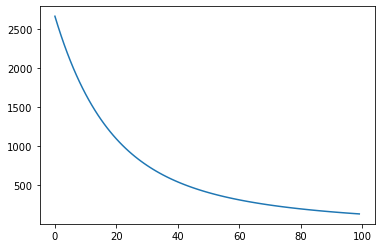

In [110]:
plt.plot(losses)